# Iowa Liquor Sales Trends 2013-2016

![](banner_iowa_liquor.jpg)

Kernel Density Estimation (KDE)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Situation

The Iowa Department of Commerce requires that every store that sells alcohol in bottled form for off-the-premises consumption must hold a class "E" liquor license (an arrangement typical of most of the state alcohol regulatory bodies). All alcohol sales made by stores registered thusly with the Iowa Department of Commerce are logged in the Commerce department system, which is in turn published as open data by the State of Iowa.  The full dataset contains information on the name, kind, price, quantity, and location of sale of sales of individual containers or packages of containers of alcoholic beverages.  The datasets we use here are paritions of the full dataset by years 2013, 2014, 2015, and 2016, and have been prepared for analysis.

* **Role:** Sales & marketing manager or product manager for a liquor wholesaler, Iowa region. 
* **Business Decisions:** What is your product bundling strategy?  What is your product pricing strategy?
* **Approach:** Determine (an approximation of) the underlying processes for Iowa retail liquor sales in 2013, 2014, 2015, and 2016 periods, use insights to inform your strategy decisions.  
* **Dataset:** State of Iowa, Department of Commerce, Retail Liquor Sales (https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy)

## Underlying Process for 2016 Sales Transactions

### Retrieve data for 2016.

In [2]:
data.2016.all = rbind(read.csv("Iowa Liquor 2016 (part 1).csv"),
                      read.csv("Iowa Liquor 2016 (part 2).csv"))
size(data.2016.all)
head(data.2016.all)

observations,variables
2279879,7


store_ID,store_name,sale.dollars,volume.gallons,year,month,day
3621,"Jensen Liquors, Ltd.",32.25,0.20,2016,1,26
2552,Hy-Vee Food Store #3 / Cedar Rapids,58.74,0.40,2016,1,12
2513,Hy-Vee Food Store #2 / Iowa City,352.44,2.38,2016,1,13
3869,Bootleggin' Barzini's Fin,88.11,0.59,2016,1,13
2106,Hillstreet News and Tobacco,29.37,0.20,2016,1,14
2248,Ingersoll Liquor and Beverage,1057.32,7.13,2016,1,28


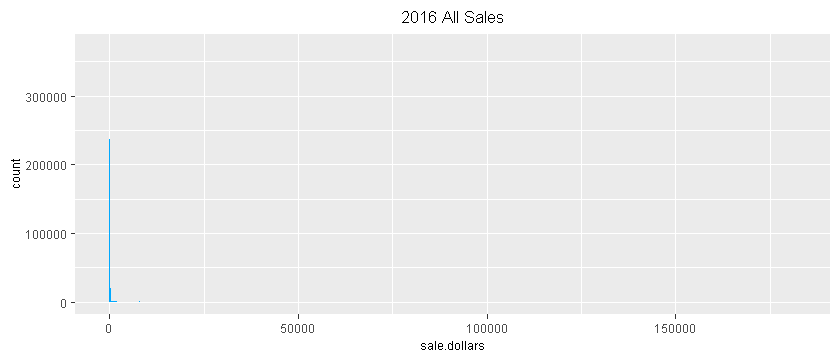

In [3]:
ggplot(data.2016.all) + ggtitle("2016 All Sales") + geom_histogram(aes(x=sale.dollars), binwidth=10, fill=PALETTE[1])

### Focus on sub-\\$500 transactions.

In [4]:
data.frame(min_value=min(data.2016.all$sale.dollars), # minimum value transaction
           max_value=max(data.2016.all$sale.dollars), # maximum value transaction
           number_transactions_over_500=length(which(data.2016.all$sale.dollars > 500)), # number of transactions over $500
           fraction_transactions_over_500=length(which(data.2016.all$sale.dollars > 500)) / nrow(data.2016.all)) # fraction of transactions over $500

min_value,max_value,number_transactions_over_500,fraction_transactions_over_500
0,181962,37209,0.0163206


In [5]:
data.2016 = read.csv("Iowa Liquor 2016.csv") # not strictly necessary to read file again
data.2016 = data.2016[data.2016$sale.dollars<=500,]
size(data.2016)
head(data.2016)

observations,variables
2242670,7


,store_ID,store_name,sale.dollars,volume.gallons,year,month,day
1,3621,"Jensen Liquors, Ltd.",32.25,0.20,2016,1,26
2,2552,Hy-Vee Food Store #3 / Cedar Rapids,58.74,0.40,2016,1,12
3,2513,Hy-Vee Food Store #2 / Iowa City,352.44,2.38,2016,1,13
4,3869,Bootleggin' Barzini's Fin,88.11,0.59,2016,1,13
5,2106,Hillstreet News and Tobacco,29.37,0.20,2016,1,14
7,2651,Hy-Vee / Waverly,29.37,0.20,2016,1,5


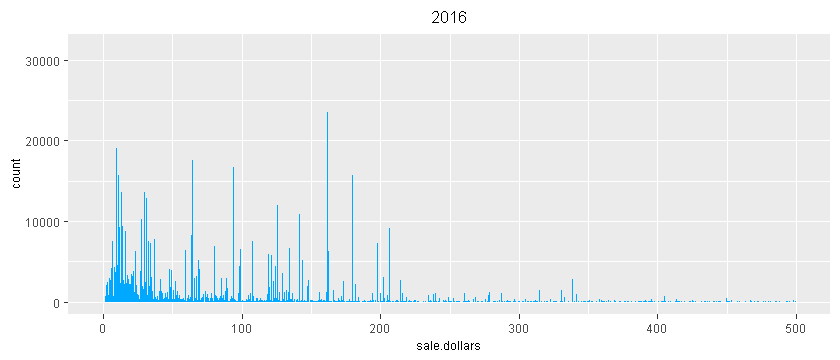

In [6]:
ggplot(data.2016) + ggtitle("2016") + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[1])

### Explore possible underlying processes.

Try kernel density estimation with gaussian, rectangular, and triangular kernels, all at bandwidth 50.

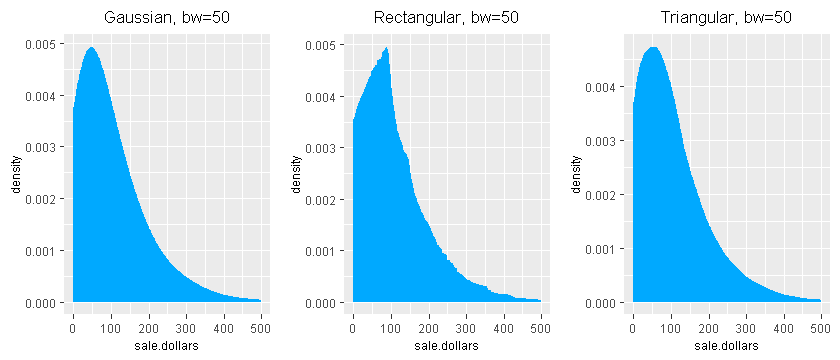

In [7]:
p = ggplot(data.2016)

grid.arrange(p + ggtitle("Gaussian, bw=50")    + geom_density(aes(sale.dollars), kernel="gaussian",    bw=50),
             p + ggtitle("Rectangular, bw=50") + geom_density(aes(sale.dollars), kernel="rectangular", bw=50),
             p + ggtitle("Triangular, bw=50")  + geom_density(aes(sale.dollars), kernel="triangular",  bw=50),
             nrow=1)

### Explore more possible underlying processes.

Try kernel density estimation with gaussian kernel as bandwidths (standard deviations) 1, 10, 50.

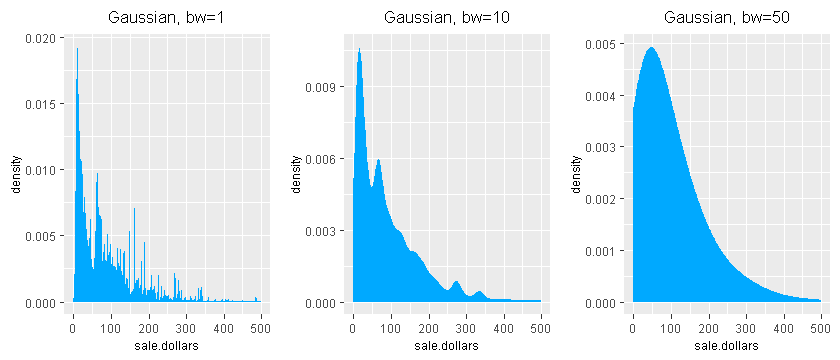

In [8]:
p = ggplot(data.2016)

grid.arrange(p + ggtitle("Gaussian, bw=1")  + geom_density(aes(sale.dollars), kernel="gaussian", bw=1),
             p + ggtitle("Gaussian, bw=10") + geom_density(aes(sale.dollars), kernel="gaussian", bw=10),
             p + ggtitle("Gaussian, bw=50") + geom_density(aes(sale.dollars), kernel="gaussian", bw=50),
             nrow=1)

## Compare Underlying Processes for 2013, 2014, 2015, 2016

### Retrieve data for 2013, 2014, 2015.  Focus on sub-\\$500 transactions.

In [9]:
data.2013 = rbind(read.csv("Iowa Liquor 2013 (part 1).csv"),
                  read.csv("Iowa Liquor 2013 (part 2).csv"))
size(data.2013)

data.2013 = data.2013[data.2013$sale.dollars<500,]
size(data.2013)
head(data.2013)

observations,variables
2063763,7


observations,variables
2015258,7


,store_ID,store_name,sale.dollars,volume.gallons,year,month,day
1,4794,Smokin' Joe's #17 Tobacco and Liquor,130.00,0.79,2013,2,20
2,3908,County Market #214 / Fort Madison,135.00,3.17,2013,7,8
3,3929,Liquor And Tobacco Outlet,51.00,0.21,2013,5,21
4,2551,Hy-Vee Food Store / Chariton,98.82,1.19,2013,11,26
5,3990,Cork and Bottle / Oskaloosa,37.30,0.40,2013,4,17
7,3858,Harolds Jack N Jill / Davenport,43.95,0.13,2013,4,2


In [10]:
data.2014 = rbind(read.csv("Iowa Liquor 2014 (part 1).csv"),
                  read.csv("Iowa Liquor 2014 (part 2).csv"))
size(data.2014)

data.2014 = data.2014[data.2014$sale.dollars<500,]
size(data.2014)
head(data.2014)

observations,variables
2097796,7


observations,variables
2045298,7


store_ID,store_name,sale.dollars,volume.gallons,year,month,day
2614,Hy-Vee #3 Food and Drugstore,78.00,0.79,2014,2,26
2603,Hy-Vee Wine and Spirits / Bettendorf,98.94,2.77,2014,4,7
4819,Super Stop 2 / Altoona,62.28,2.77,2014,6,12
2515,Hy-Vee Food Store #1 / Mason City,66.22,0.40,2014,5,23
4167,"Iowa Street Market, Inc.",99.12,2.38,2014,4,2
2642,Hy-Vee Wine and Spirits / Pella,97.92,2.38,2014,10,8


In [11]:
data.2015 = rbind(read.csv("Iowa Liquor 2015 (part 1).csv"),
                  read.csv("Iowa Liquor 2015 (part 2).csv"))
size(data.2015)

data.2015 = data.2015[data.2015$sale.dollars<=500,]
size(data.2015)
head(data.2015)

observations,variables
2184483,7


observations,variables
2128269,7


store_ID,store_name,sale.dollars,volume.gallons,year,month,day
2191,Keokuk Spirits,162.84,1.19,2015,11,20
2205,Ding's Honk And Holler,325.68,2.38,2015,11,21
3549,Quicker Liquor Store,19.20,0.08,2015,11,16
2513,Hy-Vee Food Store #2 / Iowa City,160.02,1.39,2015,11,4
3942,Twin Town Liquor,19.20,0.08,2015,11,17
3650,"Spirits, Stogies and Stuff",53.34,0.46,2015,11,11


### Compare total transactions by year.

year,transactions
2013,2015258
2014,2045298
2015,2128269
2016,2242670


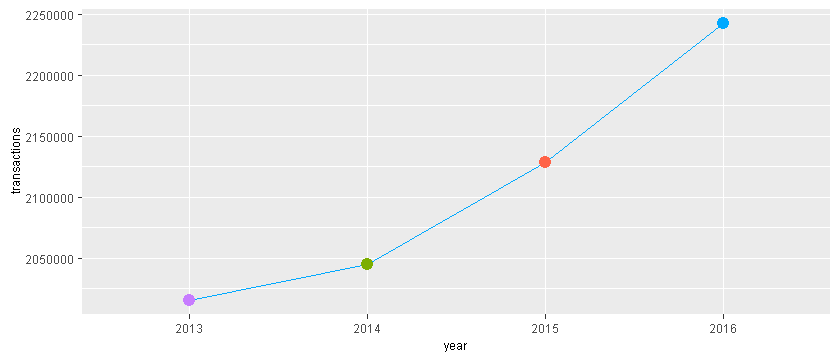

In [12]:
data.compare_transactions = data.frame(year=c("2013", "2014", "2015", "2016"),
                                       transactions=c(nrow(data.2013), nrow(data.2014), nrow(data.2015), nrow(data.2016)))
data.compare_transactions

ggplot(data.compare_transactions) +
geom_line(aes(x=year, y=transactions, group=1)) +
geom_point(aes(x=year, y=transactions, color=year)) +
scale_color_manual(values=rev(PALETTE[1:4])) +
theme.no_legend

### Compare total sales by year.

year,sales
2013,186509707
2014,192273720
2015,200854930
2016,198275574


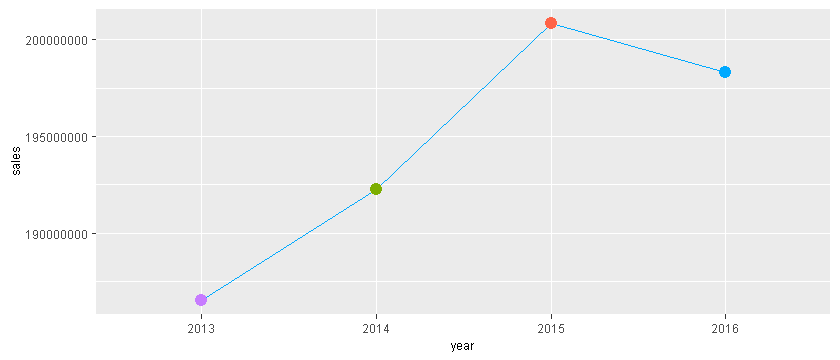

In [13]:
data.compare_sales = data.frame(year=c("2013", "2014", "2015", "2016"),
                                sales=c(sum(data.2013$sale.dollars), sum(data.2014$sale.dollars), sum(data.2015$sale.dollars), sum(data.2016$sale.dollars)))
data.compare_sales

ggplot(data.compare_sales) +
geom_line(aes(x=year, y=sales, group=1)) +
geom_point(aes(x=year, y=sales, color=year)) +
scale_color_manual(values=rev(PALETTE[1:4])) +
theme.no_legend

### Compare distributions by year.

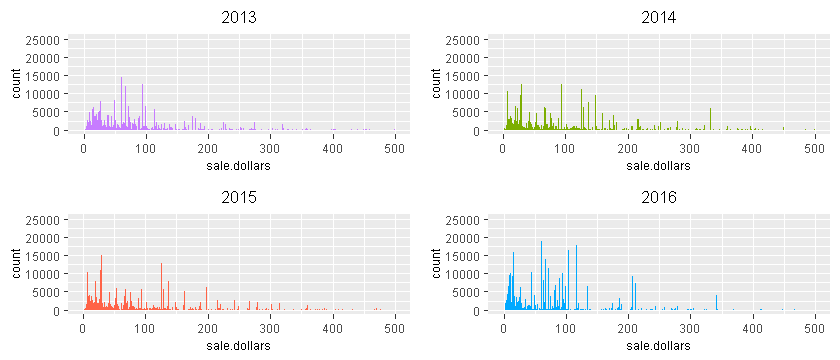

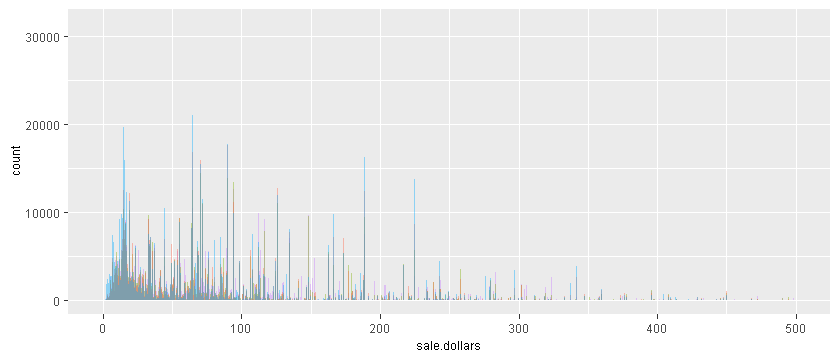

In [14]:
p1 = ggplot(data.2013) + ggtitle("2013") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[4], na.rm=TRUE)
p2 = ggplot(data.2014) + ggtitle("2014") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[3], na.rm=TRUE)
p3 = ggplot(data.2015) + ggtitle("2015") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[2], na.rm=TRUE)
p4 = ggplot(data.2016) + ggtitle("2016") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[1], na.rm=TRUE)

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + xlim(0,500) +
geom_histogram(aes(x=sale.dollars), data=data.2013, binwidth=0.2, fill=PALETTE[4], alpha=0.4, na.rm=TRUE) +
geom_histogram(aes(x=sale.dollars), data=data.2014, binwidth=0.2, fill=PALETTE[3], alpha=0.4, na.rm=TRUE) +
geom_histogram(aes(x=sale.dollars), data=data.2015, binwidth=0.2, fill=PALETTE[2], alpha=0.4, na.rm=TRUE) +
geom_histogram(aes(x=sale.dollars), data=data.2016, binwidth=0.2, fill=PALETTE[1], alpha=0.4, na.rm=TRUE)

### Choose a useful underlying process.

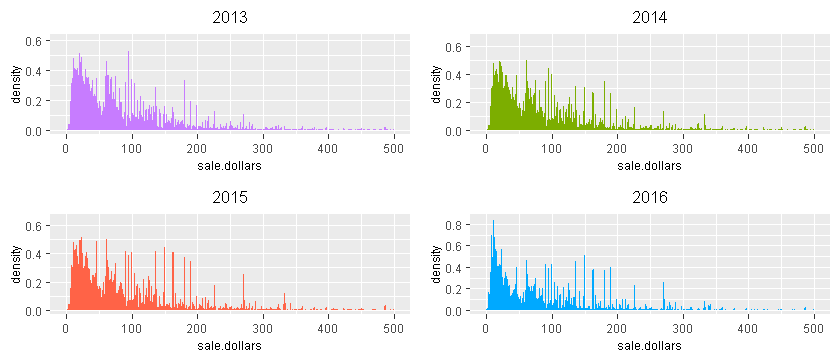

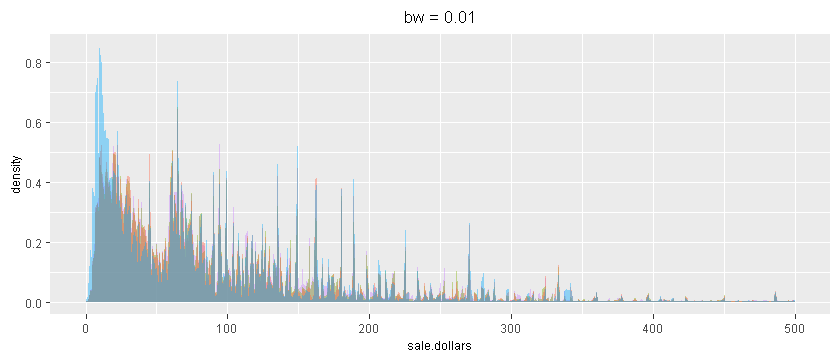

In [15]:
bandwidth = 0.01

p1 = ggplot(data.2013) + ggtitle("2013") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[4])

p2 = ggplot(data.2014) + ggtitle("2014") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[3])

p3 = ggplot(data.2015) + ggtitle("2015") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[2])

p4 = ggplot(data.2016) + ggtitle("2016") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[1])

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + ggtitle(sprintf("bw = %0.2f", bandwidth)) + xlim(0,500) +
geom_density(aes(sale.dollars), data=data.2013, kernel="gaussian", bw=bandwidth, fill=PALETTE[4], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2014, kernel="gaussian", bw=bandwidth, fill=PALETTE[3], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2015, kernel="gaussian", bw=bandwidth, fill=PALETTE[2], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2016, kernel="gaussian", bw=bandwidth, fill=PALETTE[1], alpha=0.4)

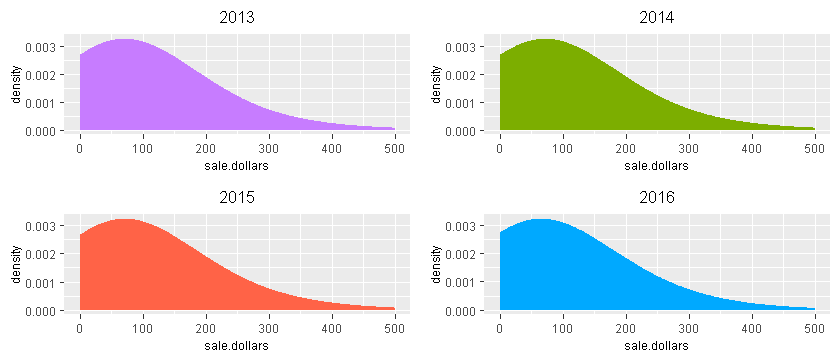

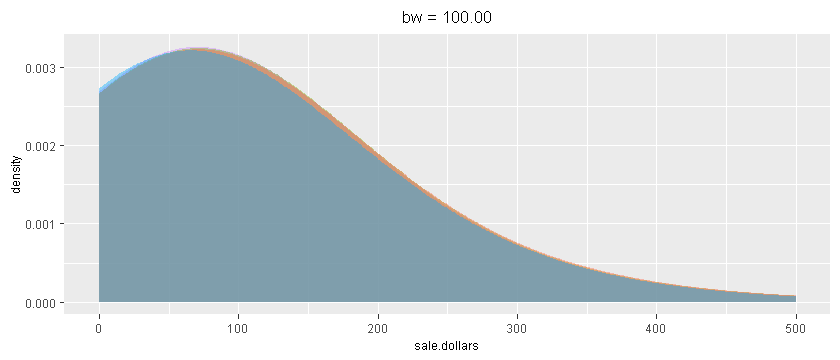

In [16]:
bandwidth = 100

p1 = ggplot(data.2013) + ggtitle("2013") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[4])

p2 = ggplot(data.2014) + ggtitle("2014") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[3])

p3 = ggplot(data.2015) + ggtitle("2015") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[2])

p4 = ggplot(data.2016) + ggtitle("2016") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[1])

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + ggtitle(sprintf("bw = %0.2f", bandwidth)) + xlim(0,500) +
geom_density(aes(sale.dollars), data=data.2013, kernel="gaussian", bw=bandwidth, fill=PALETTE[4], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2014, kernel="gaussian", bw=bandwidth, fill=PALETTE[3], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2015, kernel="gaussian", bw=bandwidth, fill=PALETTE[2], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2016, kernel="gaussian", bw=bandwidth, fill=PALETTE[1], alpha=0.4)

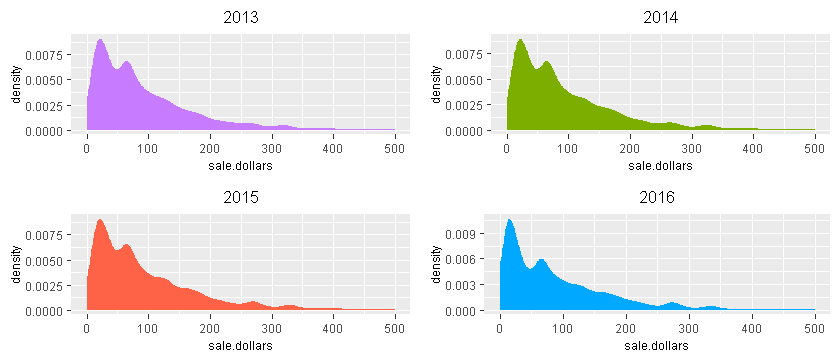

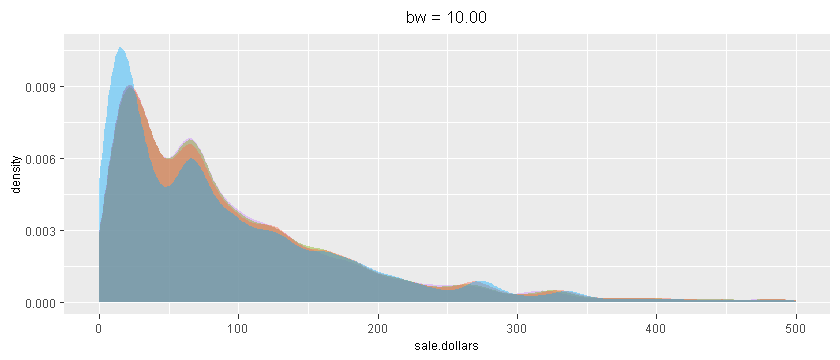

In [17]:
bandwidth = 10

p1 = ggplot(data.2013) + ggtitle("2013") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[4])

p2 = ggplot(data.2014) + ggtitle("2014") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[3])

p3 = ggplot(data.2015) + ggtitle("2015") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[2])

p4 = ggplot(data.2016) + ggtitle("2016") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[1])

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + ggtitle(sprintf("bw = %0.2f", bandwidth)) + xlim(0,500) +
geom_density(aes(sale.dollars), data=data.2013, kernel="gaussian", bw=bandwidth, fill=PALETTE[4], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2014, kernel="gaussian", bw=bandwidth, fill=PALETTE[3], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2015, kernel="gaussian", bw=bandwidth, fill=PALETTE[2], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2016, kernel="gaussian", bw=bandwidth, fill=PALETTE[1], alpha=0.4)

## Implications for Low-\\$ Transactions

### \\$0 to \\$20

In [18]:
d = density(data.2013$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2013.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2013.0_20)

p.2013.0_20
0.1311276


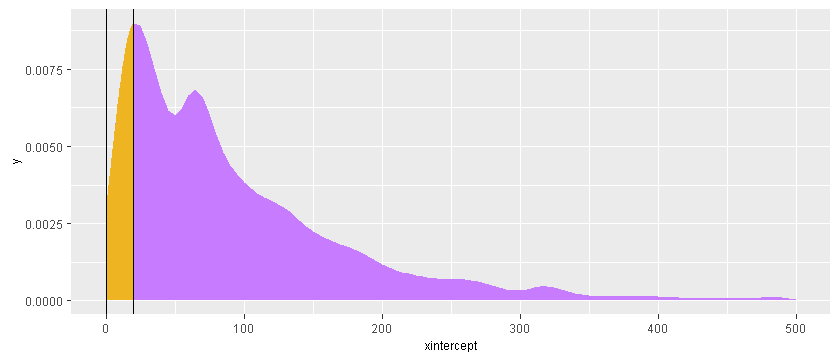

In [19]:
ggplot(data=data.2013) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[4]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

In [20]:
d = density(data.2014$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2014.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2014.0_20)

p.2014.0_20
0.1285568


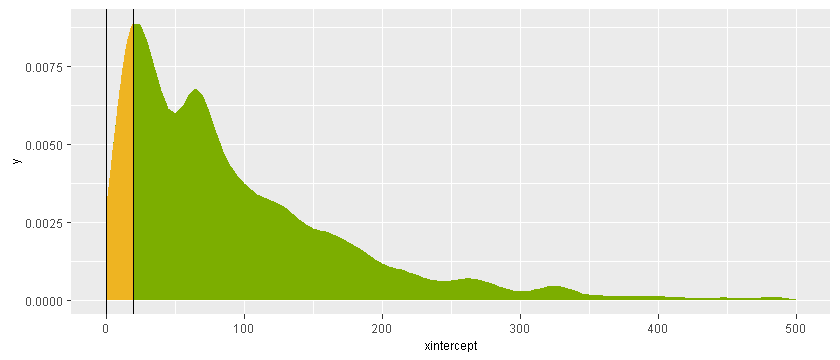

In [21]:
ggplot(data=data.2014) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[3]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

In [22]:
d = density(data.2015$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2015.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2015.0_20)

p.2015.0_20
0.1314526


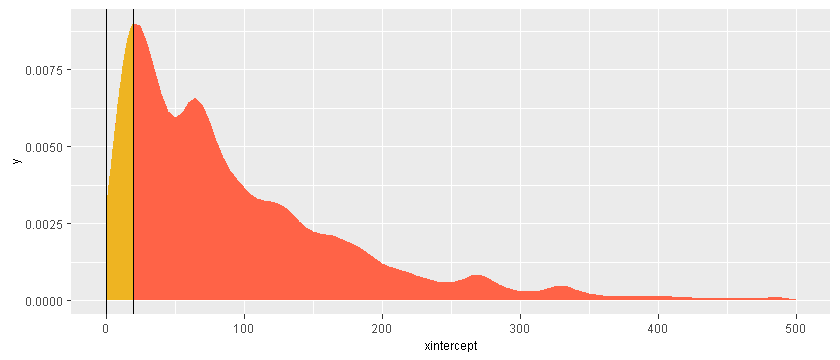

In [23]:
ggplot(data=data.2015) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[2]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

In [24]:
d = density(data.2016$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2016.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2016.0_20)

p.2016.0_20
0.1809047


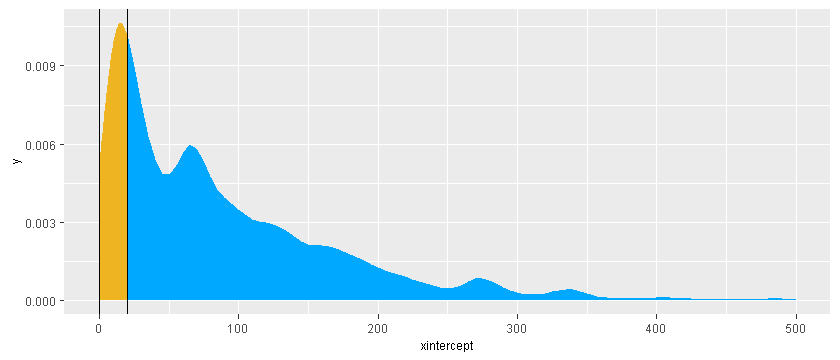

In [25]:
ggplot(data=data.2016) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[1]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

year,probability
2013,0.1311276
2014,0.1285568
2015,0.1314526
2016,0.1809047


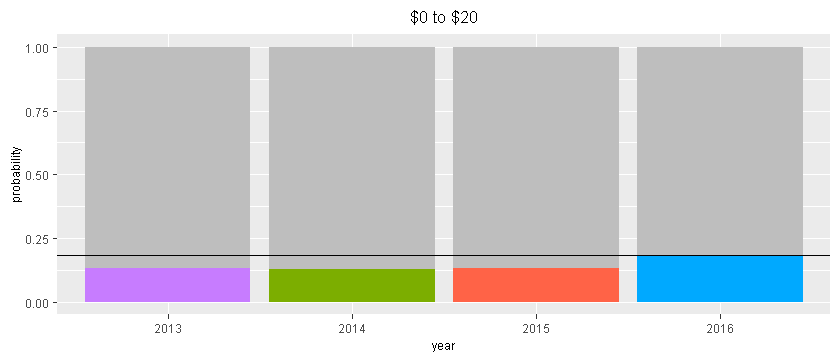

In [26]:
data.0_20 = data.frame(year=c("2013", "2014", "2015", "2016"),
                       probability=c(p.2013.0_20, p.2014.0_20, p.2015.0_20, p.2016.0_20))
data.0_20

ggplot(data.0_20) + ggtitle("$0 to $20") + ylab("probability") +
geom_col(aes(x=year, y=1), fill="gray") +
geom_col(aes(x=year, y=probability, fill=year)) +
geom_hline(yintercept=data.0_20$probability[4]) +
scale_fill_manual(values=rev(PALETTE[1:4])) +
theme.no_legend

### \\$20 to \\$50

In [27]:
d = density(data.2013$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2013.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2013.20_50)

p.2013.20_50
0.2263016


In [28]:
d = density(data.2014$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2014.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2014.20_50)

p.2014.20_50
0.2250215


In [29]:
d = density(data.2015$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2015.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2015.20_50)

p.2015.20_50
0.2262596


In [30]:
d = density(data.2016$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2016.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2016.20_50)

p.2016.20_50
0.2029079


year,probability
2013,0.2263016
2014,0.2250215
2015,0.2262596
2016,0.2029079


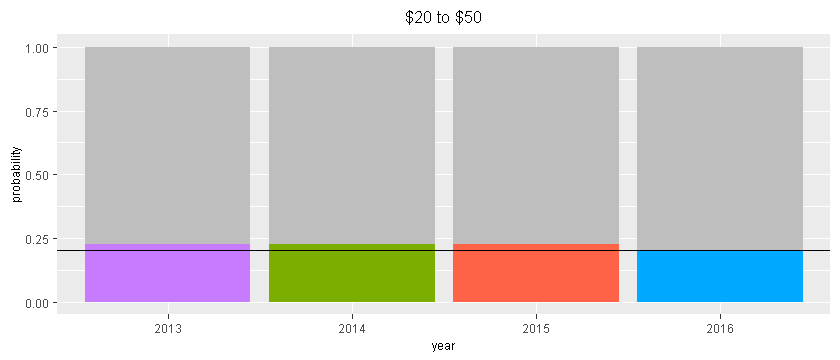

In [31]:
data.20_50 = data.frame(year=c("2013", "2014", "2015", "2016"), probability=c(p.2013.20_50, p.2014.20_50, p.2015.20_50, p.2016.20_50))
data.20_50

ggplot(data.20_50) + ggtitle("$20 to $50") + ylab("probability") +
geom_col(aes(x=year, y=1), fill="gray") +
geom_col(aes(x=year, y=probability, fill=year)) +
geom_hline(yintercept=data.20_50$probability[4]) +
scale_fill_manual(values=rev(PALETTE[1:4])) + 
theme.no_legend

## Discussion

* What insights are provided by the data that can inform your decision?
* What other insights might you find with more data exploration?
* What is your bundling strategy?
* What is your pricing strategy?

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised January 3, 2021
</span>
</p>
</font>